In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [0]:
# CNN predictions
predictions = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ7BJk4NNDeZ6ijCP4ea8Berc8q9hFKEWFI_c_TE4MUQvGtC1ZPSXy3s2R2IRDoD5wGLjyBey_lqqQd/pub?gid=1044707959&single=true&output=csv')

In [0]:
# LSTM encoder - decoder
predictionsLSTM = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQKLYoGsF0oNN7EVOhnEbsQejrpqmDvyxbN-AmUw_aUB5cuTR6R_dfDk-nCMG4k7Xr0sd2i_lxscg7v/pub?gid=432510109&single=true&output=csv')

# CNN test

In [0]:
predictions

Y     Y_hat
0      1.129320  1.129260
1      1.129350  1.129220
2      1.128820  1.128960
3      1.129170  1.129090
4      1.129170  1.129120
...         ...       ...
12472  1.100308  1.101734
12473  1.098952  1.099822
12474  1.100580  1.102381
12475  1.101314  1.101478
12476  1.100193  1.102704

[12477 rows x 2 columns]

In [0]:
test2 = multiStep(predictions['Y_hat'], predictions['Y'], 0.000001,0.01)

--- multi step analysis ---
The mean, median and mode of the number of acceptable predictions are:
95.97692307692307

The number and rate of profitable trades is:
130.0
1.0

The number and rate of locally optimal is:
9.0
0.06923076923076923

A plot showing the changing of the boolean values over time:


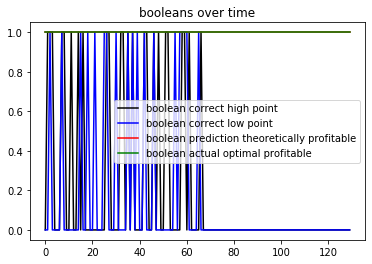

<Figure size 432x288 with 0 Axes>

In [0]:
multiStepPlotting(test2)

In [0]:
information = tradeInfo(predictions['Y'], predictions['Y_hat'],130)

Portfolio Value over time:


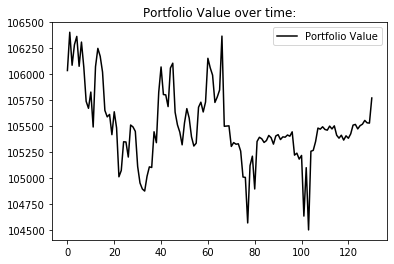

Action taken over time:


<Figure size 432x288 with 0 Axes>

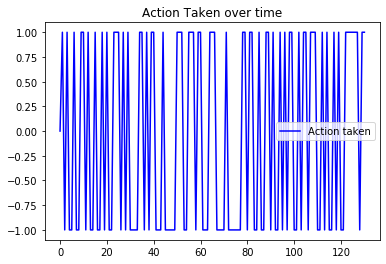

Profitability action taken over time:


<Figure size 432x288 with 0 Axes>

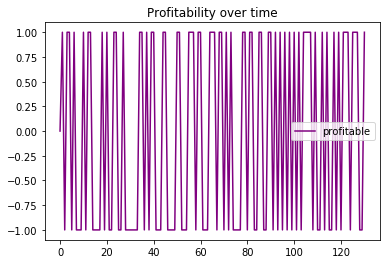

mean portfolio value
105504.52345364024
Final Value
106284.9975071155
The profit is:
248.49750711550587
The profit in percentages is:
0.2343509141809715


<Figure size 432x288 with 0 Axes>

In [0]:
trader(information,0.000001,1.12073) #1.11974

Portfolio Value over time:


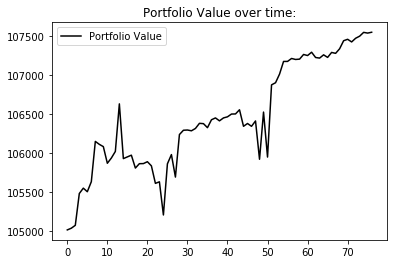

Action taken over time:


<Figure size 432x288 with 0 Axes>

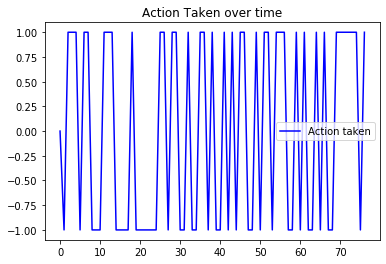

Profitability action taken over time:


<Figure size 432x288 with 0 Axes>

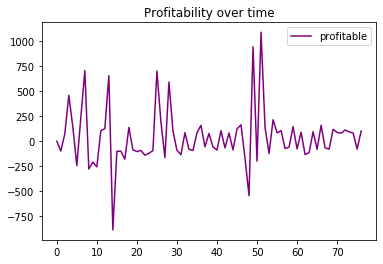

mean profit made over time
40.03505471070361
total profit
3042.6641580134747
mean portfolio value
106438.49818410404
Final Value
107551.7823660995
The profit is:
2534.2823660995055
The profit in percentages is:
2.4132000534191973


<Figure size 432x288 with 0 Axes>

In [0]:
equalTimeTrader(information,0.000001)

In [0]:
absError = np.zeros(len(predictions['Y']))
for i in range(len(predictions['Y'])):
  absError[i] = abs(predictions['Y'][i]-predictions['Y_hat'][i])
print(absError.mean())
print(absError[len(predictions['Y'])-1])

0.0009617744350655029
0.002510547637939453


In [0]:
transactionCostArray = np.array([0.000001, 0.00001, 0.0001,0.001])
for i in (transactionCostArray):
  rate = profitableRate(information, i)
  print(rate)

1.0
1.0
1.0
1.0


# LSTM Test

In [0]:
# general test
lstmTest = multiStep(predictionsLSTM['Y_hat'], predictionsLSTM['Y'], 0.00000001,0.01)

--- multi step analysis ---
The mean, median and mode of the number of acceptable predictions are:
65.86153846153846

The number and rate of profitable trades is:
68.0
0.5230769230769231

The number and rate of locally optimal is:
0.0
0.0

A plot showing the changing of the boolean values over time:


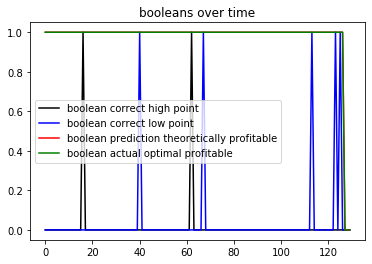

<Figure size 432x288 with 0 Axes>

In [0]:
multiStepPlotting(lstmTest)

In [0]:
# trading test
tradeInformation = tradeInfo(predictionsLSTM['Y'],predictionsLSTM['Y_hat'], 127) #1.12073

Portfolio Value over time:


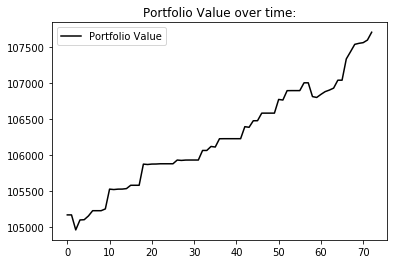

Action taken over time:


<Figure size 432x288 with 0 Axes>

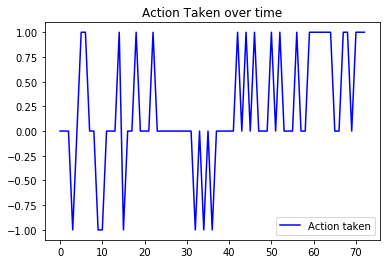

Profitability action taken over time:


<Figure size 432x288 with 0 Axes>

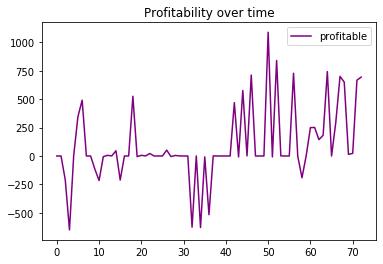

mean profit made over time
97.70306011511265
total profit
7132.323388403223
mean portfolio value
106239.11284209689
Final Value
107878.03690181827
The profit is:
2711.774513588898
The profit in percentages is:
2.578559370664114


<Figure size 432x288 with 0 Axes>

In [0]:
equalTimeTraderLSTM(tradeInformation,0.000001)

In [0]:
# mean absolute error
absErrorLSTM = np.empty(len(predictionsLSTM['Y']))
for i in range(len(predictionsLSTM['Y'])):
  absErrorLSTM[i] = abs(predictionsLSTM['Y'][i]-predictionsLSTM['Y_hat'][i])
print(absErrorLSTM.mean())

x = 1
while(absErrorLSTM[len(predictionsLSTM['Y'])-x] == 0):
  x = x+1
print (x)

print(np.count_nonzero(absErrorLSTM))
print((absErrorLSTM.sum()/np.count_nonzero(absErrorLSTM)))


0.0004019049448186045
7
10466
0.00046987472814833216


In [0]:
# Profitable trade rate
transactionCostArray = np.array([0.000001, 0.00001, 0.0001,0.001])
for i in (transactionCostArray):
  rate = profitableRate(tradeInformation, i)
  print(rate)

0.5354330708661418
0.5354330708661418
0.5275590551181102
0.5039370078740157


# Functions

In [0]:
# function to compute the profitable rate
def profitableRate(tradeInfo, transactionCost):
  count = 0
  length = 0
  for j in range(len(tradeInfo[0,:])):
    if(tradeInfo[0,j] != 0):
      length = length + 1
      if(tradeInfo[0,j] - tradeInfo[1,j] > transactionCost):
        count = count + 1
  return(count/length)


In [0]:
def equalTimeTrader(tradeInfo, transactionCost):
  euro = 50000
  dollar = 50000

  def portfolioValue (dollar, euro, actualExchangeRate): # returns portfolio value in dollars
    portfolioValue = dollar + actualExchangeRate*euro
    return portfolioValue 

#currentExchangeRate = actualRates[t], predictedExchangeRate = predictedRates [t+1]
  def determineOptAction(highRate, lowRate, order ,transactionCost):
    if(highRate - lowRate >= transactionCost): # trans
      if(order == 0): # Maximum rate before minimum rate
        return -1 # buy then sell dollar --> dollar +1000, euro + 1000
      elif(order == 1): # Minimum Rate before high rate
        return 1  # sell dollar then buy dollar --> dollar +1000,
    else: # no trade
      return 0

# method that checks whether a profit was made over a time period
  def profitable(newPFValue, pfValue):
    if(newPFValue > pfValue): # profitable
      return 1
    elif(newPFValue < pfValue): # loss incurred 
      return -1
    else: # value remained equal
      return 0

# tradeTracker = array that keeps track of information needed to assess trades
  tradeTracker = np.zeros((3,77))

# initialization of tradetracker array (starting point)
  tradeTracker[0,0] = portfolioValue(dollar,euro,tradeInfo[2,53]) #FIRST ROW TRACKS actual portfolio value
  tradeTracker[1,0] = 0 # optimal action tracker
  tradeTracker[2,0] = 0 # profit / even / loss tracker

  for i in range(53,len(tradeInfo[0,:])-1):
                                # high rate, low, rate, order, transactionCost
    optimal = determineOptAction(tradeInfo[0,i],tradeInfo[1,i],tradeInfo[3,i],transactionCost)
    tradeTracker[1,i-53+1] = optimal #

    if(dollar != 0 and euro != 0): # We only allow exchanging of the portfolio, no shorts or such.
      if(optimal == -1 ): # high before low
        # buy then sell dollars
      
        dollar = dollar + 10000  #purchasing 1000 dollars
        euro = euro - 10000/tradeInfo[0,i] # at the euro equivalent cost
        pfValue1 = portfolioValue(dollar,euro,tradeInfo[0,i]) # artificial ?

        dollar = dollar - 10000 #selling 1000 dollars
        euro = euro + 10000/tradeInfo[1,i] #gaining the equivalent in euros
        pfValue2 = portfolioValue(dollar,euro,tradeInfo[1,i])
      
        
        tradeTracker[0,i-53+1] = portfolioValue(dollar,euro,tradeInfo[2,i])  # updating the portfolio value
        tradeTracker[2,i-53+1] = pfValue2 -pfValue1 # checking whether the portfolio value has increased

      elif (optimal == 1): # low before high
        # sell than buy dollar
        
        dollar = dollar - 10000 #selling 1000 dollars
        euro = euro + 10000/tradeInfo[1,i] #gaining the equivalent in euros
        pfValue1 = portfolioValue(dollar,euro,tradeInfo[1,i])

        dollar = dollar + 10000  #purchasing 1000 dollars
        euro = euro - 10000/tradeInfo[0,i] # at the euro equivalent cost
        pfValue2 = portfolioValue(dollar,euro,tradeInfo[0,i])

        tradeTracker[0,i-53+1] = portfolioValue(dollar, euro, tradeInfo[2,i]) # updating the portfolio value
        tradeTracker[2,i-53+1] = pfValue2 -pfValue1 # checking whether the portfolio value has increased

      else: # no trade
        tradeTracker[0,i-53+1] = portfolioValue(dollar,euro, tradeInfo[2,i]) # updating the portfolio value
        tradeTracker[2,i-53+1] = tradeTracker[0,i-53+1] -tradeTracker[0,i-53] # update = profitable(newPFValue, pfValue) 

    else: # if one possesses only one currency , we assume one cannot short the other for the time being
      tradeTracker[0,i-53+1] = portfolioValue(dollar,euro, tradeInfo[2,i]) # updating portfolio value
      tradeTracker[2,i-53+1] = tradeTracker[0,i-53+1] - tradeTracker[0,i-53] # tracking profitability
  
  # tracks portfolio value over time
  print('Portfolio Value over time:')
  plt.figure()
  plt.plot(tradeTracker[0,:], 'black', label='Portfolio Value')
  plt.title('Portfolio Value over time:')
  plt.legend()
  plt.show()
  plt.savefig('PortfolioValue.png', bbox_inches='tight')

  # Second plot: action taken over time
  print('Action taken over time:')
  plt.figure()
  plt.plot(tradeTracker[1,:], 'blue', label='Action taken')
  plt.title('Action Taken over time')
  plt.legend()
  plt.show()
  plt.savefig('ActionTaken.png', bbox_inches='tight')

  #Third plot: whether action was profitable
  print('Profitability action taken over time:')
  plt.figure()
  plt.plot(tradeTracker[2,:], 'purple', label='profitable')
  plt.title('Profitability over time')
  plt.legend()
  plt.show()
  plt.savefig('ProfitabilityAction.png', bbox_inches='tight')

  print('mean profit made over time')
  print(tradeTracker[2,0:len(tradeTracker)-4].mean())
  print('total profit')
  print(tradeTracker[2,0:len(tradeTracker)-4].sum())

  print('mean portfolio value')
  print(tradeTracker[0,0:len(tradeTracker)-4].mean())
  print('Final Value')
  print(tradeTracker[0,len(tradeTracker)-4])
  # calculate profit in dollars
  print('The profit is:')
  print((tradeTracker[0,len(tradeTracker)-4] - tradeTracker[0,0]))
  # calculate profit in percentage
  print('The profit in percentages is:')
  print(((tradeTracker[0,len(tradeTracker)-4] -tradeTracker[0,0])/tradeTracker[0,0])*100)

In [0]:
def equalTimeTraderLSTM(tradeInfo, transactionCost):
  euro = 50000
  dollar = 50000

  def portfolioValue (dollar, euro, actualExchangeRate): # returns portfolio value in dollars
    portfolioValue = dollar + actualExchangeRate*euro
    return portfolioValue 

#currentExchangeRate = actualRates[t], predictedExchangeRate = predictedRates [t+1]
  def determineOptAction(highRate, lowRate, order ,transactionCost):
    if(highRate - lowRate >= transactionCost): # trans
      if(order == 0): # Maximum rate before minimum rate
        return -1 # buy then sell dollar --> dollar +1000, euro + 1000
      elif(order == 1): # Minimum Rate before high rate
        return 1  # sell dollar then buy dollar --> dollar +1000,
    else: # no trade
      return 0

# method that checks whether a profit was made over a time period
  def profitable(newPFValue, pfValue):
    if(newPFValue > pfValue): # profitable
      return 1
    elif(newPFValue < pfValue): # loss incurred 
      return -1
    else: # value remained equal
      return 0

# tradeTracker = array that keeps track of information needed to assess trades
  tradeTracker = np.zeros((3,77))

# initialization of tradetracker array (starting point)
  tradeTracker[0,0] = portfolioValue(dollar,euro,tradeInfo[2,53]) #FIRST ROW TRACKS actual portfolio value
  tradeTracker[1,0] = 0 # optimal action tracker
  tradeTracker[2,0] = 0 # profit / even / loss tracker

  for i in range(53,len(tradeInfo[0,:])-1):
                                # high rate, low, rate, order, transactionCost
    optimal = determineOptAction(tradeInfo[0,i],tradeInfo[1,i],tradeInfo[3,i],transactionCost)
    tradeTracker[1,i-53+1] = optimal #

    if(dollar != 0 and euro != 0): # We only allow exchanging of the portfolio, no shorts or such.
      if(optimal == -1 ): # high before low
        # buy then sell dollars
      
        dollar = dollar + 10000  #purchasing 1000 dollars
        euro = euro - 10000/tradeInfo[0,i] # at the euro equivalent cost
        pfValue1 = portfolioValue(dollar,euro,tradeInfo[0,i]) # artificial ?

        dollar = dollar - 10000 #selling 1000 dollars
        euro = euro + 10000/tradeInfo[1,i] #gaining the equivalent in euros
        pfValue2 = portfolioValue(dollar,euro,tradeInfo[1,i])
      
        
        tradeTracker[0,i-53+1] = portfolioValue(dollar,euro,tradeInfo[2,i])  # updating the portfolio value
        tradeTracker[2,i-53+1] = pfValue2 -pfValue1 # checking whether the portfolio value has increased

      elif (optimal == 1): # low before high
        # sell than buy dollar
        
        dollar = dollar - 10000 #selling 1000 dollars
        euro = euro + 10000/tradeInfo[1,i] #gaining the equivalent in euros
        pfValue1 = portfolioValue(dollar,euro,tradeInfo[1,i])

        dollar = dollar + 10000  #purchasing 1000 dollars
        euro = euro - 10000/tradeInfo[0,i] # at the euro equivalent cost
        pfValue2 = portfolioValue(dollar,euro,tradeInfo[0,i])

        tradeTracker[0,i-53+1] = portfolioValue(dollar, euro, tradeInfo[2,i]) # updating the portfolio value
        tradeTracker[2,i-53+1] = pfValue2 -pfValue1 # checking whether the portfolio value has increased

      else: # no trade
        tradeTracker[0,i-53+1] = portfolioValue(dollar,euro, tradeInfo[2,i]) # updating the portfolio value
        tradeTracker[2,i-53+1] = tradeTracker[0,i-53+1] -tradeTracker[0,i-53] # update = profitable(newPFValue, pfValue) 

    else: # if one possesses only one currency , we assume one cannot short the other for the time being
      tradeTracker[0,i-53+1] = portfolioValue(dollar,euro, tradeInfo[2,i]) # updating portfolio value
      tradeTracker[2,i-53+1] = tradeTracker[0,i-53+1] - tradeTracker[0,i-53] # tracking profitability
  
  # tracks portfolio value over time
  print('Portfolio Value over time:')
  plt.figure()
  plt.plot(tradeTracker[0,0:len(tradeTracker)-7], 'black', label='Portfolio Value')
  plt.title('Portfolio Value over time:')
  plt.legend()
  plt.show()
  plt.savefig('PortfolioValue.png', bbox_inches='tight')

  # Second plot: action taken over time
  print('Action taken over time:')
  plt.figure()
  plt.plot(tradeTracker[1,0:len(tradeTracker)-7], 'blue', label='Action taken')
  plt.title('Action Taken over time')
  plt.legend()
  plt.show()
  plt.savefig('ActionTaken.png', bbox_inches='tight')

  #Third plot: whether action was profitable
  print('Profitability action taken over time:')
  plt.figure()
  plt.plot(tradeTracker[2,0:len(tradeTracker)-7], 'purple', label='profitable')
  plt.title('Profitability over time')
  plt.legend()
  plt.show()
  plt.savefig('ProfitabilityAction.png', bbox_inches='tight')

  print('mean profit made over time')
  print(tradeTracker[2,0:len(tradeTracker)-7].mean())
  print('total profit')
  print(tradeTracker[2,0:len(tradeTracker)-7].sum())

  print('mean portfolio value')
  print(tradeTracker[0,0:len(tradeTracker)-7].mean())
  print('Final Value')
  print(tradeTracker[0,len(tradeTracker)-7])
  # calculate profit in dollars
  print('The profit is:')
  print((tradeTracker[0,len(tradeTracker)-7] - tradeTracker[0,0]))
  # calculate profit in percentage
  print('The profit in percentages is:')
  print(((tradeTracker[0,len(tradeTracker)-7] -tradeTracker[0,0])/tradeTracker[0,0])*100)

In [0]:
# needed for the trader method
# beginningValue = open price first period of data
def appendBeginningValue(beginningValue, actualRates):
  returnArray = np.empty(len(actualRates)+1)
  returnArray[0] = beginningValue
  for i in range(1,len(actualRates)+1):
    returnArray[i] = actualRates[i-1]
  return returnArray

In [0]:
# Function that returns the information relevant for the analysis of some
def tradeInfo(actualRates,predictedRates,lengthMultiArray):
  infoTracker = np.zeros((4,lengthMultiArray))

  for i in range (0,len(actualRates),96):
    timeHorizonActual = np.empty(96)
    for j in range (i,i+96): # selecting the next 96 value
      if(j <= len(actualRates)-1):
        timeHorizonActual[j%96] = actualRates[j]

    timeHorizonPredictions = np.empty(96)
    for j in range (i,i+96): # selecting the next 96 values
      if(j <= len(actualRates)-1):
        timeHorizonPredictions[j%96] = predictedRates[j]

    indexMaximumPredictions = 0
    indexMinimumPredictions = 0

    for t in range(len(timeHorizonPredictions)):
      if(timeHorizonPredictions[t] > timeHorizonPredictions[indexMaximumPredictions] ):
        indexMaximumPredictions = t
      elif(timeHorizonPredictions[t] < timeHorizonPredictions[indexMinimumPredictions]):
        indexMinimumPredictions = t
        
    infoTracker[0,int(i/96)] = timeHorizonActual[indexMaximumPredictions] # daily high price
    infoTracker[1,int(i/96)] = timeHorizonActual[indexMinimumPredictions] # daily low price
    infoTracker[2,int(i/96)] = timeHorizonActual[len(timeHorizonActual)-1] # daily close price
        
    if(indexMaximumPredictions > indexMinimumPredictions): # high price comes after low price
      infoTracker[3,int(i/96)] =  1 
  return infoTracker

In [0]:
def trader(tradeInfo, transactionCost, startingRate):
  euro = 50000
  dollar = 50000

  def portfolioValue (dollar, euro, actualExchangeRate): # returns portfolio value in dollars
    portfolioValue = dollar + actualExchangeRate*euro
    return portfolioValue 

#currentExchangeRate = actualRates[t], predictedExchangeRate = predictedRates [t+1]
  def determineOptAction(highRate, lowRate, order ,transactionCost):
    if(highRate - lowRate >= transactionCost): # trans
      if(order == 0): # Maximum rate before minimum rate
        return -1 # buy then sell dollar
      elif(order == 1): # Minimum Rate before high rate
        return 1  # sell dollar then buy dollar
    else: # no trade
      return 0

# method that checks whether a profit was made over a time period
  def profitable(newPFValue, pfValue):
    if(newPFValue > pfValue): # profitable
      return 1
    elif(newPFValue < pfValue): # loss incurred 
      return -1
    else: # value remained equal
      return 0

# tradeTracker = array that keeps track of information needed to assess trades
  tradeTracker = np.zeros((3,len(tradeInfo[0,:])+1))

# initialization of tradetracker array (starting point)
  tradeTracker[0,0] = portfolioValue(dollar,euro,startingRate) #FIRST ROW TRACKS actual portfolio value
  tradeTracker[1,0] = 0 # optimal action tracker
  tradeTracker[2,0] = 0 # profit / even / loss tracker

  for i in range(len(tradeInfo[0,:])):
                                # high rate, low, rate, order, transactionCost
    optimal = determineOptAction(tradeInfo[0,i],tradeInfo[1,i],tradeInfo[3,i],transactionCost)
    tradeTracker[1,i+1] = optimal #

    if(dollar != 0 and euro != 0): # We only allow exchanging of the portfolio, no shorts or such.
      if(optimal == -1 ): # high before low
        # buy then sell dollars
      
        dollar = dollar + 1000  #purchasing 1000 dollars
        euro = euro - 1000/tradeInfo[0,i] # at the euro equivalent cost


        dollar = dollar - 1000 #selling 1000 dollars
        euro = euro + 1000/tradeInfo[1,i] #gaining the equivalent in euros
      
        tradeTracker[0,i+1] = portfolioValue(dollar,euro,tradeInfo[2,i]) # updating the portfolio value
        tradeTracker[2,i+1] = profitable(tradeTracker[0,i+1], tradeTracker[0,i]) # checking whether the portfolio value has increased

      elif (optimal == 1): # low before high
        # sell than buy dollar
        
        dollar = dollar - 1000 #selling 1000 dollars
        euro = euro + 1000/tradeInfo[1,i] #gaining the equivalent in euros

        dollar = dollar + 1000  #purchasing 1000 dollars
        euro = euro - 1000/tradeInfo[0,i] # at the euro equivalent cost

        tradeTracker[0,i+1] = portfolioValue(dollar,euro, tradeInfo[2,i]) # updating the portfolio value
        tradeTracker[2,i+1] = profitable(tradeTracker[0,i+1], tradeTracker[0,i]) # checking whether the portfolio value has increased

      else: # no trade
        tradeTracker[0,i+1] = portfolioValue(dollar,euro, tradeInfo[2,i]) # updating the portfolio value
        tradeTracker[2,i+1] = profitable(tradeTracker[0,i+1], tradeTracker[0,i]) # update = profitable(newPFValue, pfValue) 

    else: # if one possesses only one currency , we assume one cannot short the other for the time being
      tradeTracker[0,i+1] = portfolioValue(dollar,euro, tradeInfo[2,i]) # updating portfolio value
      tradeTracker[2,i+1] = profitable(tradeTracker[0,i+1], tradeTracker[0,i]) # tracking profitability
  
  # tracks portfolio value over time
  print('Portfolio Value over time:')
  plt.figure()
  plt.plot(tradeTracker[0,:], 'black', label='Portfolio Value')
  plt.title('Portfolio Value over time:')
  plt.legend()
  plt.show()
  plt.savefig('PortfolioValue.png', bbox_inches='tight')

  # Second plot: action taken over time
  print('Action taken over time:')
  plt.figure()
  plt.plot(tradeTracker[1,:], 'blue', label='Action taken')
  plt.title('Action Taken over time')
  plt.legend()
  plt.show()
  plt.savefig('ActionTaken.png', bbox_inches='tight')

  #Third plot: whether action was profitable
  print('Profitability action taken over time:')
  plt.figure()
  plt.plot(tradeTracker[2,:], 'purple', label='profitable')
  plt.title('Profitability over time')
  plt.legend()
  plt.show()
  plt.savefig('ProfitabilityAction.png', bbox_inches='tight')

  print('mean portfolio value')
  print(tradeTracker[0,:].mean())
  print('Final Value')
  print(tradeTracker[0,len(tradeTracker)-1])
  # calculate profit in dollars
  print('The profit is:')
  print((tradeTracker[0,len(tradeTracker)-1] - tradeTracker[0,0]))
  # calculate profit in percentage
  print('The profit in percentages is:')
  print(((tradeTracker[0,len(tradeTracker)-1] -tradeTracker[0,0])/tradeTracker[0,0])*100)

In [0]:
def maxIndex(rates):
  index = 0
  for i in range(len(rates)):
    if(rates[i] >= rates[index]):
      index = i
  return index

In [0]:
# Function to return the index of a minimum value in an array
def minIndex(rates):
  index = 0
  for i in range(len(rates)):
    if(rates[i] <= rates[index]):
      index = i
  return index

In [0]:
# Attempt at sequential trading assessment simulation for multiple time steps
def multiStep(predictedRates, actualRates, transactionCost,accuracyRate):
  # Assume output neural net =  2d array with number of rows = number of steps ahead and number of columns = length actualRates or vice versa
     
  multiTracker = np.zeros((9,130))
  for i in range (0,len(actualRates),96):
    
    timeHorizonActual = np.empty(96)
    timeHorizonPredictions = np.empty(96)
      # moving the window of actual rates along 1 step at the time 
    for j in range (i,i+96): # shift to 96
      if(j <= len(actualRates)-1):
        # for k in range(96):
          timeHorizonActual[j%96] = actualRates[j]
          timeHorizonPredictions[j%96] = predictedRates[j]
    # Function to return the index of a maximum value in an array
    # print('test')
    # print(i)
    # print(j)
    # print(timeHorizonActual[2])
    # print('end test')
    # Variable initialization

    indexMaximumPredictions = 0
    indexMinimumPredictions = 0
    indexMaximumActual = 0
    indexMinimumActual = 0

    for t in range(len(timeHorizonPredictions)):
      if(timeHorizonPredictions[t] > timeHorizonPredictions[indexMaximumPredictions] ):
        indexMaximumPredictions = t
      elif(timeHorizonPredictions[t] < timeHorizonPredictions[indexMinimumPredictions]):
        indexMinimumPredictions = t
    for t in range(len(timeHorizonActual)):
      if(timeHorizonActual[t] > timeHorizonActual[indexMaximumActual] ):
        indexMaximumActual = t
      elif(timeHorizonActual[t] < timeHorizonActual[indexMinimumActual]):
        indexMinimumActual = t

    # print('test')
    # print('actual optimum')
    # print(timeHorizonActual[indexMaximumActual] - timeHorizonActual[indexMinimumActual])
    # print('predicted optimum')
    # print(timeHorizonPredictions[indexMaximumPredictions] - timeHorizonPredictions[indexMinimumPredictions])
    # print('actual result')
    # print(timeHorizonActual[indexMaximumPredictions] - timeHorizonActual[indexMinimumPredictions])
    # print('end test')

    multiTracker[7][int(i/96)] = indexMaximumPredictions
    multiTracker[8][int(i/96)] = indexMinimumPredictions

    # predicted maximum at same time as actual maximum
    if( indexMaximumPredictions == indexMaximumActual):
      multiTracker[0][int(i/96)] = 1
    else:
      multiTracker[0][int(i/96)] = 0
    # PredictedMinimum at same time as actual minimum
    if( indexMinimumPredictions == indexMinimumActual):
      multiTracker[1][int(i/96)] = 1
    else:
      multiTracker[1][int(i/96)] = 0
    # optimal action based on predictions is profitable in the first place
    if( timeHorizonPredictions[indexMaximumPredictions] - timeHorizonPredictions[indexMinimumPredictions] >= transactionCost):
      multiTracker[2][int(i/96)] = 1
    else:
      multiTracker[2][int(i/96)] = 0
    # Actual optimal action is profitable
    if( timeHorizonActual[indexMaximumActual] - timeHorizonActual[indexMinimumActual] >= transactionCost):
      multiTracker[3][int(i/96)] = 1
    else:
      multiTracker[3][int(i/96)] = 0

    if(i < len(actualRates)): # counting the predictions with acceptable accuracy
      count = 0
      for x in range(len(timeHorizonPredictions)):
        if((1-accuracyRate)*timeHorizonActual[x] <=timeHorizonPredictions[x] <=(1+accuracyRate)*timeHorizonActual[x] ): # prediction was within range of actual rate
          count += 1
      multiTracker[4][int(i/96)] = count

      # predictedOptimal strategy is profitable in actual case
      if( (timeHorizonActual[indexMaximumPredictions] - timeHorizonActual[indexMinimumPredictions])>= transactionCost):
        multiTracker[5][int(i/96)] = 1
      else:
        multiTracker[5][int(i/96)] = 0

      
      
      #local optimality of strategy
      if( indexMaximumPredictions == indexMaximumActual):
        if(indexMinimumPredictions == indexMinimumActual):
          if( timeHorizonPredictions[indexMaximumPredictions] - timeHorizonPredictions[indexMinimumPredictions] >= transactionCost):
             multiTracker[6][int(i/96)]= 1
      else:
        multiTracker[6][int(i/96)] = 0
  
  return multiTracker # returns an analysis of the multi step case

In [0]:
# Attempt at sequential trading assessment simulation for multiple time steps
def multiStepTrade(predictedRates, actualRates, transactionCost,accuracyRate):
  # Assume output neural net =  2d array with number of rows = number of steps ahead and number of columns = length actualRates or vice versa
  
  # function comparing the expected future rates at one point in time with the actual times
  def singlePhase(timeHorizonPredictions, timeHorizonActual, transactionCost,accuracyRate):
    rateTracker = np.zeros((9,1))
    

    # Variable initialization
    indexMaximumPredictions = maxIndex(timeHorizonPredictions)
    indexMaximumActual = maxIndex(timeHorizonActual)
    indexMinimumPredictions = minIndex(timeHorizonPredictions)
    indexMinimumActual= minIndex(timeHorizonPredictions)

    rateTracker[7] = indexMaximumPredictions
    rateTracker[8] = indexMinimumPredictions
    # predicted maximum at same time as actual maximum
    if( indexMaximumPredictions == indexMaximumActual):
      rateTracker[0] = 1
    else:
      rateTracker[0] = 0
    # PredictedMinimum at same time as actual minimum
    if( indexMinimumPredictions == indexMinimumActual):
      rateTracker[1] = 1
    else:
      rateTracker[1] = 0
    # optimal action based on predictions is profitable in the first place
    if( timeHorizonPredictions[indexMaximumPredictions] - timeHorizonPredictions[indexMinimumPredictions] >= transactionCost):
      rateTracker[2] = 1
    else:
      rateTracker[2] = 0
    # Actual optimal action is profitable
    if( timeHorizonActual[indexMaximumActual] - timeHorizonActual[indexMinimumActual] >= transactionCost):
      rateTracker[3] = 1
    else:
      rateTracker[3] = 0

    # counting the predictions with acceptable accuracy
    count = 0
    for i in range(len(timeHorizonPredictions)-1):
      if((1-accuracyRate)*timeHorizonActual[i] <=timeHorizonPredictions[i] <=(1+accuracyRate)*timeHorizonActual[i] ): # prediction was within range of actual rate
        count += 1
      else:
        next
    rateTracker[4] = count

    # predictedOptimal strategy is profitable in actual case
    if( timeHorizonActual[indexMaximumPredictions] - timeHorizonActual[indexMinimumPredictions] >= transactionCost):
      rateTracker[5] = 1
    else:
      rateTracker[5] = 0
    
    #local optimality of strategy
    count2 = 0
    for i in range (2):
      count2 += rateTracker[i]
    if (count2 == 3):
      rateTracker[6] = 1
    else:
      rateTracker[6] = 0

    return rateTracker
    # end of single phase method

  # initial array to which the single phase instances are to be appended
  multiTracker = np.zeros((9,1))
    
# range of i is smallest array, predicted or actual, meaning for which one has the fewest time steps.
  for i in range (0,len(actualRates),96):
    
    timeHorizonActual = np.empty(96)
    timeHorizonPredictions = np.empty(96)
      # moving the window of actual rates along 1 step at the time 
    for j in range (i,i+95):
      if(j <= len(actualRates)-1):
          timeHorizonActual[j%96] = actualRates[j]
          timeHorizonPredictions[j%96] = predictedRates[j]
      
    current = singlePhase(timeHorizonPredictions,timeHorizonActual,transactionCost, accuracyRate) # analysis of single time step
    multiTracker = np.append(multiTracker,current, axis = 1) # add the results of the single time step analysis to the array storing all the steps
      # multiTracker = np.delete(multiTracker, 0, 1) # deleting the initialising row of zero's
  
  return multiTracker # returns an analysis of the multi step case

In [0]:
def multiStepPlotting(multiTracker):
  # Analysis of accuracy
  print('--- multi step analysis ---')
  meanNumberOfAcceptablePredictions = multiTracker[4,:].mean()
  # medianNumberOfAcceptblePredictions = multiTracker[4,:].median()
  # modeOfAcceptablePredictions = multiTracker[4,:].mode()

  print('The mean, median and mode of the number of acceptable predictions are:')
  print(meanNumberOfAcceptablePredictions)
  # print(medianNumberOfAcceptblePredictions)
  # print(modeOfAcceptablePredictions)
  print()

  
  # Checking profitability of trade based on only prediction
  print('The number and rate of profitable trades is:')
  numberOfProfitableTrades =  multiTracker[5,:].sum()
  rateOfProfitableTrades = multiTracker[5,:].mean()

  print(numberOfProfitableTrades)
  print(rateOfProfitableTrades)
  print()

  # Checking the amount of times the prediction achieved the actual locally optimal strategy
  print('The number and rate of locally optimal is:')
  numberOfLocalOptima = multiTracker[6,:].sum()
  rateOfLocalOptima = multiTracker[6,:].mean()
  print(numberOfLocalOptima)
  print(rateOfLocalOptima)
  print()

  print('A plot showing the changing of the boolean values over time:')
  plt.figure()
  plt.plot(multiTracker[0,:], 'black', label='boolean correct high point')
  plt.plot(multiTracker[1,:], 'blue', label='boolean correct low point')
  plt.plot(multiTracker[2,:], 'red', label='boolean prediction theoretically profitable')
  plt.plot(multiTracker[3,:], 'Green', label='boolean actual optimal profitable')
  plt.title('booleans over time')
  plt.legend()
  plt.show()
  plt.savefig('multiStepBooleans.png', bbox_inches='tight')

